# Homework 2: Decision Trees
Due 10/21 at 11:59pm

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Linear_Models.ipynb` for full credit on this assignment.**

### Q4 : Decision Trees

Download the dataset from this website : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
The data is a csv file with the following columns:

__age__: continuous.

__workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

__fnlwgt__: continuous.

__education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

__education-num__: continuous.

__marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

__relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

__race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

__sex__: Female, Male.

__capital-gain__: continuous.

__capital-loss__: continuous.

__hours-per-week__: continuous.

__native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__target__: >50K, <=50K.

1. Read the data into a dataframe and assign column names

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
#code here
import pandas as pd
df = pd.read_csv("adult.data", 
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                        'occupation', 'relationship','race','sex','capital-gain','capital-loss',
                        'hours-per-week','native-country', 'target'])
indices = []
for i in df['marital-status']:
    if i == ' Married-civ-spouse':
        indices.append(True)
    else:
        indices.append(False)

2. Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why?

In [3]:
disc_columns = ['workclass', 'education', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'native-country']
for column in disc_columns:
    print(column, ":", len(df[column].unique()))

workclass : 9
education : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native-country : 42


In [4]:
weird_columns = ["workclass", 'occupation', 'native-country']
for column in weird_columns:
    print(df[column].unique(), '\n')

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'] 



In [35]:
df = pd.read_csv("adult.data", 
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                        'occupation', 'relationship','race','sex','capital-gain','capital-loss',
                        'hours-per-week','native-country', 'target'], 
                 na_values = [' ?', '? ', '?', ' ? '])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
perc_values = []
for column in df.columns:
    print("Percentage of missing values in", column, ": ",
          (df[column].isna().sum()/df.shape[0]*100).round(2), "%")
    perc_values.append((df[column].isna().sum()/df.shape[0]*100).round(2))

Percentage of missing values in age :  0.0 %
Percentage of missing values in workclass :  5.64 %
Percentage of missing values in fnlwgt :  0.0 %
Percentage of missing values in education :  0.0 %
Percentage of missing values in education-num :  0.0 %
Percentage of missing values in marital-status :  0.0 %
Percentage of missing values in occupation :  5.66 %
Percentage of missing values in relationship :  0.0 %
Percentage of missing values in race :  0.0 %
Percentage of missing values in sex :  0.0 %
Percentage of missing values in capital-gain :  0.0 %
Percentage of missing values in capital-loss :  0.0 %
Percentage of missing values in hours-per-week :  0.0 %
Percentage of missing values in native-country :  1.79 %
Percentage of missing values in target :  0.0 %


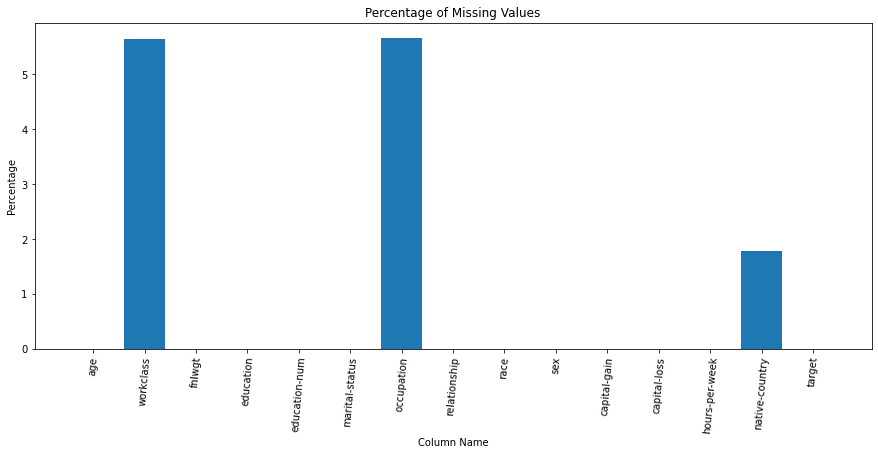

In [7]:
plt.figure(figsize = (15,6))
plt.bar(df.columns, perc_values)
plt.xticks(rotation = 85)
plt.xlabel("Column Name")
plt.ylabel("Percentage")
plt.title("Percentage of Missing Values")
plt.show()

I would not drop any columns as none of them have a high proportion of na values. We will instead drop the rows where we observe the missing value. We will not impute any values as it might disrupt the decision tree and since there is no clear method to decide the values to impute into the columns (Since they are categorical features). These values need to be dropped in order for the decision tree to get trained correctly.

3. Pick 3 categorical features and for each categorical feature, plot side-by-side bars (horizontal or vertical) of class distribution for each category. 

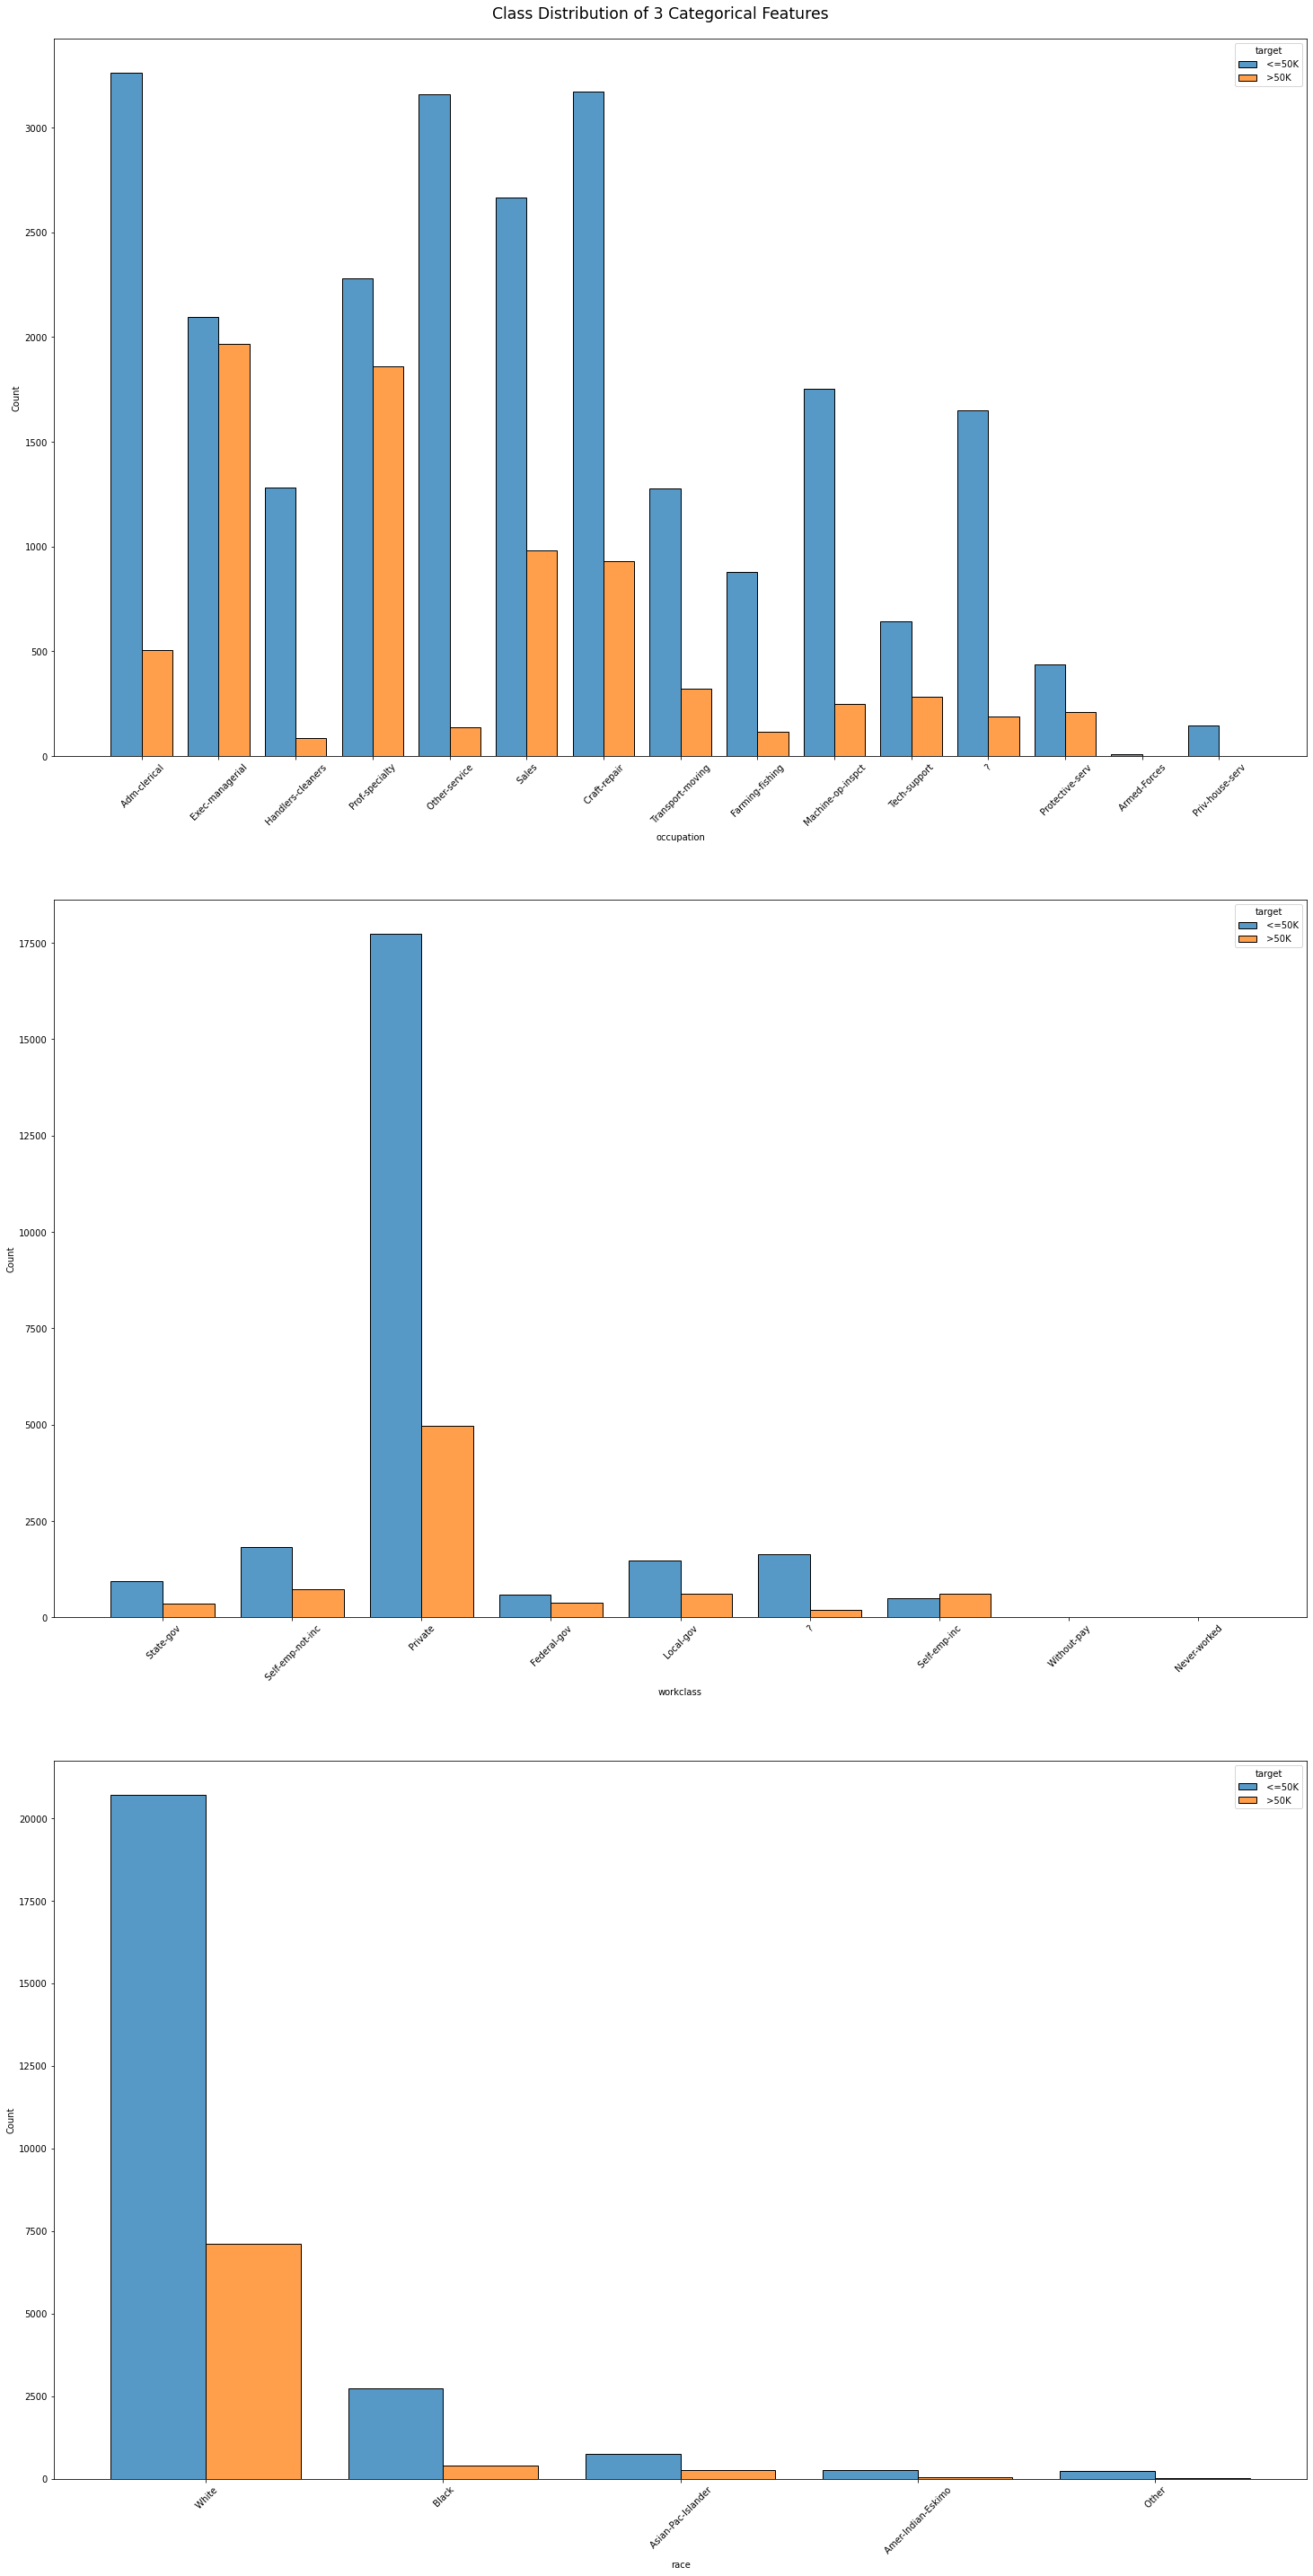

In [8]:
#code here
fig, axes = plt.subplots(3, 1, figsize = (25,50))
df_plot = pd.read_csv("adult.data", 
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                        'occupation', 'relationship','race','sex','capital-gain','capital-loss',
                        'hours-per-week','native-country', 'target'])
sns.histplot(x = 'occupation', hue = 'target', data = df_plot, multiple = 'dodge', ax = axes[0], shrink = 0.8)
sns.histplot(x = 'workclass', hue = 'target', data = df_plot, multiple = 'dodge',ax = axes[1], shrink = 0.8)
sns.histplot(x = 'race', hue = 'target', data = df_plot, multiple = 'dodge', ax = axes[2], shrink = 0.8)
axes[0].tick_params(axis='x',rotation=45)
axes[1].tick_params(axis='x',rotation=45)
axes[2].tick_params(axis='x',rotation=45)
plt.suptitle("Class Distribution of 3 Categorical Features", size = 'xx-large', y=0.89)
plt.show()

4. Split the dataset into development and test datasets using 80/20 ratio

In [36]:
#code here
from sklearn.model_selection import train_test_split

df.dropna()
y = df['target']
y = np.where(y.str.contains("<=50K"), 0, 1)
X_dev, X_test, y_dev, y_test = train_test_split(df.drop(['target'], axis = 1), y,
                                                    test_size = 0.2, random_state = 42)

5. Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on development data and test data?

In [10]:
#code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer

te_features = ['education', 'occupation', 'native-country']

ohe_features = ['workclass', 'marital-status', 'relationship', 'race', 'sex']

num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocess = make_column_transformer((StandardScaler(), num_features),
                                     (OneHotEncoder(handle_unknown = "ignore"), ohe_features),
                                     (TargetEncoder(handle_unknown = "ignore"), te_features),
                                    remainder = "passthrough")

pipe = make_pipeline(preprocess, DecisionTreeClassifier(random_state = 84))
pipe.fit(X_dev, y_dev)
print("Performance on Development data :", pipe.score(X_dev, y_dev)*100, "%")
print("Performance on Test data :", pipe.score(X_test, y_test)*100, '%')

Performance on Development data : 100.0 %
Performance on Test data : 81.63672654690619 %


6. Visualize the trained tree

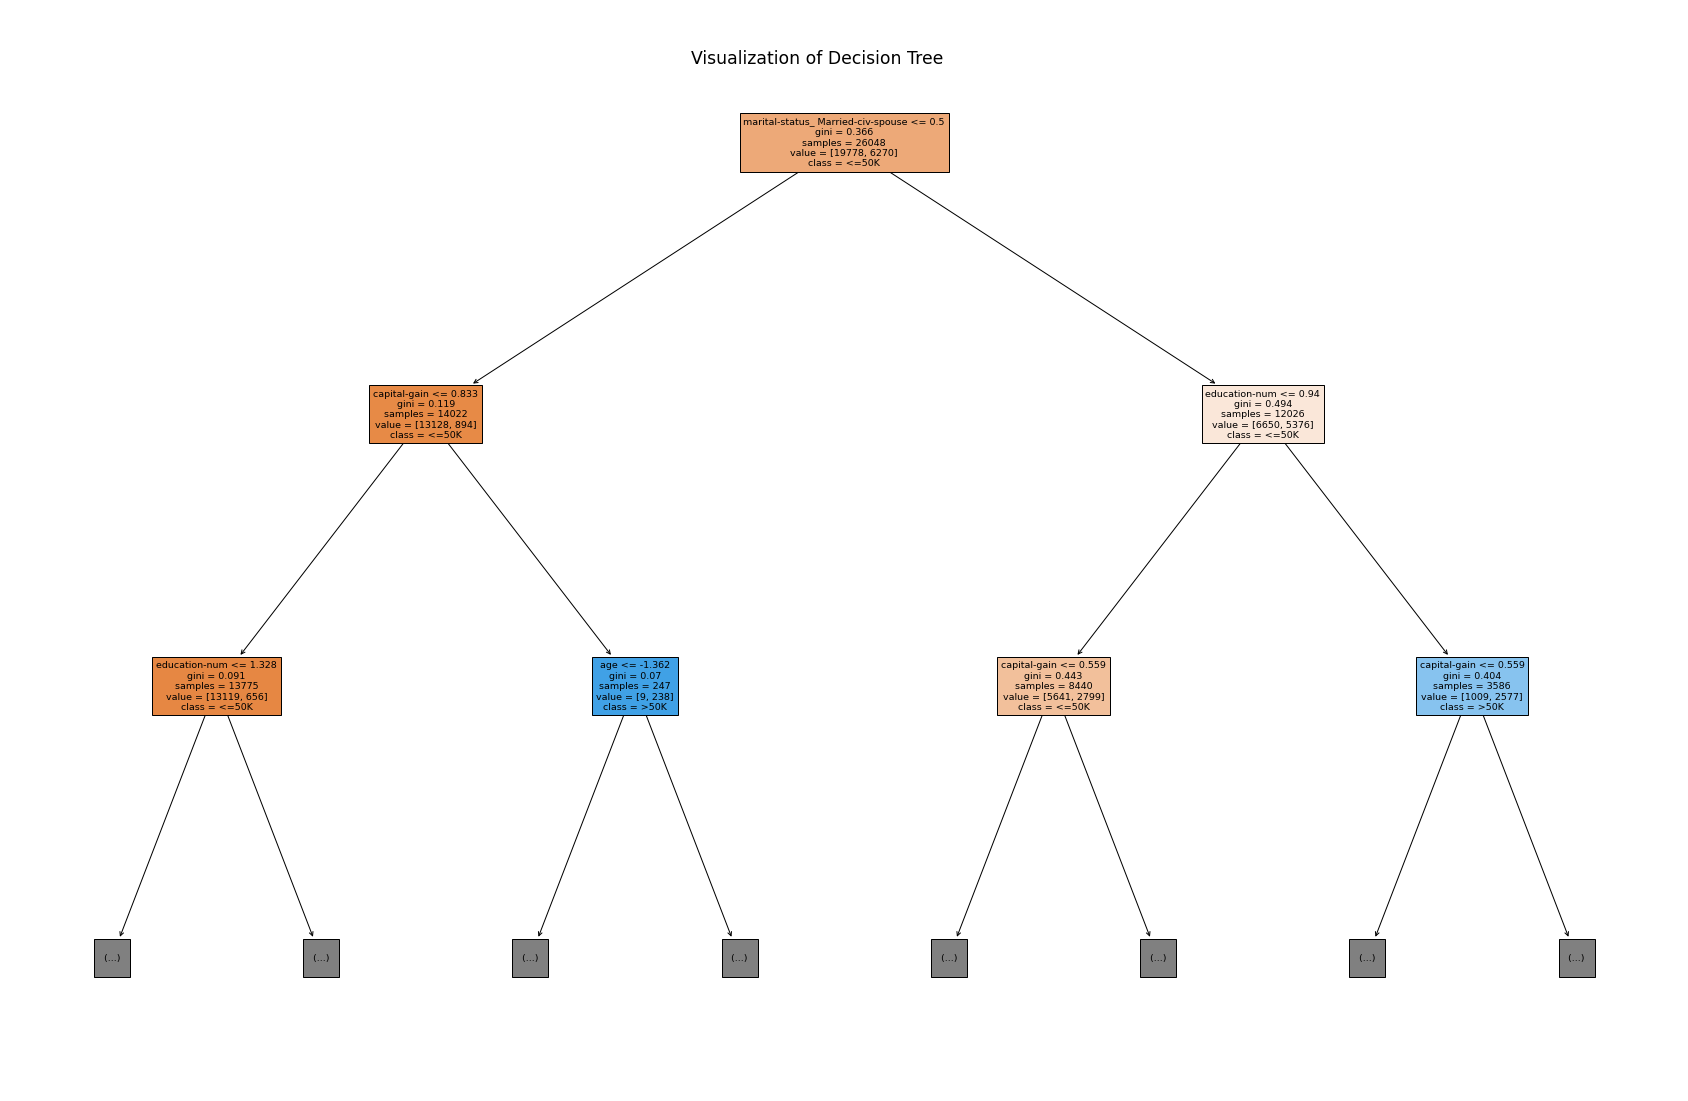

In [11]:
#code here
from sklearn.tree import plot_tree
ohe_features = preprocess.named_transformers_['onehotencoder'].get_feature_names_out().tolist()
te_features = preprocess.named_transformers_['targetencoder'].get_feature_names()
features = num_features + ohe_features + te_features

plt.figure(figsize=(30,20))
plt.suptitle("Visualization of Decision Tree", size = 'xx-large', y = 0.85)
plot_tree(pipe[1], max_depth=2, feature_names = features, class_names = ["<=50K", ">50K"], filled = True)
plt.show()

7. Prune the tree using one of the techniques discussed in class and evaluate the performance on the test set again.

In [12]:
#code here
# scores = []
# for i in np.logspace(-5, 3e-4, 10):
#     pipe = make_pipeline(preprocess, DecisionTreeClassifier(random_state = 84, ccp_alpha = i))
#     pipe.fit(X_dev, y_dev)
#     print("CCP Alpha value:" ,i)
#     print("Performance on Development data :", pipe.score(X_dev, y_dev)*100, "%")
#     print("Performance on Test data :", pipe.score(X_test, y_test)*100, '%')
#     print('\n')
#     scores.append(pipe.score(X_dev, y_dev)*100)

pipe = make_pipeline(preprocess, DecisionTreeClassifier(random_state = 84, ccp_alpha = 0.00013))
pipe.fit(X_dev, y_dev)
print("Performance on Development data :", pipe.score(X_dev, y_dev)*100, "%")
print("Performance on Test data :", pipe.score(X_test, y_test)*100, '%') 

Performance on Development data : 87.32340294840296 %
Performance on Test data : 86.51926915399969 %


8. List the top 3 most important features for this trained tree? How would you justify these features being the most important? 

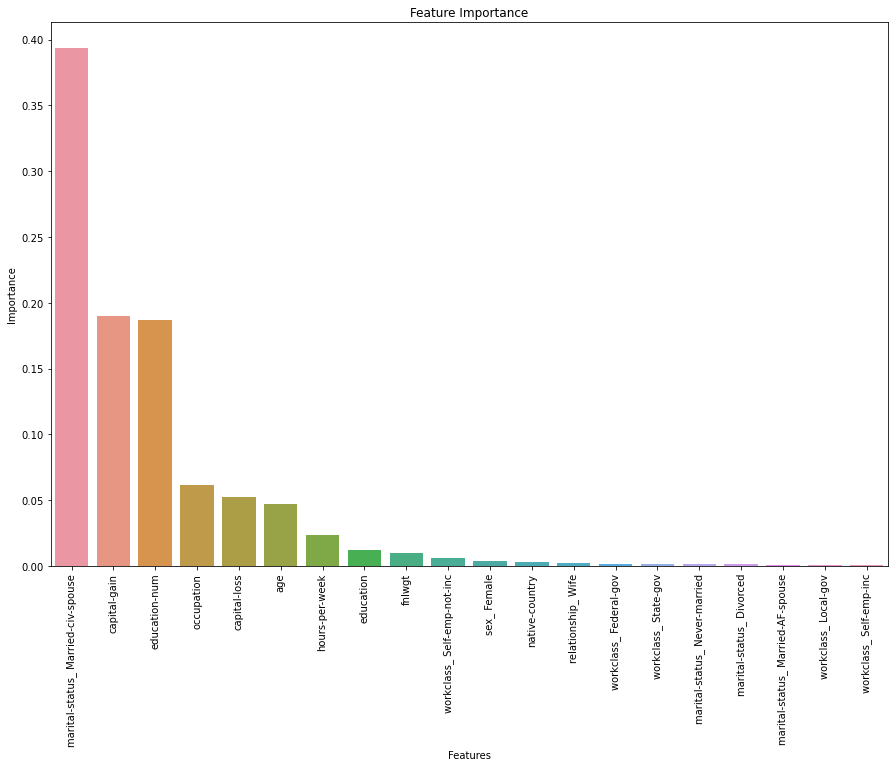

3 most important features:  ('marital-status_ Married-civ-spouse', 'capital-gain', 'education-num')


In [13]:
#code here
feat_imps = zip(features, pipe[1].feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, feat_imps)), key = lambda x : x[1], reverse = True)))
plt.figure(figsize=(15, 10))
sns.barplot(x = list(feats), y = list(imps))
plt.xticks(rotation = 90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
print("3 most important features: ", feats[:3])

In [14]:
df[df['marital-status'] == ' Married-civ-spouse']['target'].value_counts()

 <=50K    8284
 >50K     6692
Name: target, dtype: int64

The most important features obtained from the decision tree make sense as they determine the personal income bracket to a large extent. Importance of features from intuition:
1. marital-status_ Married-civ-spouse : The distribution of this feature is such that there are 8284 rows corresponding to <=50K and 6692 rows corresponding to >50K. Thus this feature is pretty significant for deciding the split of the decision tree.
2. capital-gain: More the profit from the sale of proptery or some investment, more the income. Thus, this feature will help determine income as well.
3. education-num: Highly educated people would be earning more than others. Thus, this feature will help determine income as well.

The most important features obtained from the decision tree make sense as they determine the total income to a large extent. The property of being a married civilian spouse is a great indicator to split the tree into two sub trees. Greater the capital-gain greater the income as well. One would have earned more from sale of property, investments. Additionally, education would also play a pivotal role in determining one's income. The more educated you are the higher income you earn

### Q5: Random Forests

Let's use the same dataset and the splits created in Q3.

1. Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 4.5)?

In [15]:
#code here
from sklearn.ensemble import RandomForestClassifier
pipe = make_pipeline(preprocess, RandomForestClassifier(random_state = 84))
pipe.fit(X_dev, y_dev)
print(pipe.score(X_dev, y_dev)*100)
print(pipe.score(X_test, y_test)*100)

100.0
86.19683709504069


The performance on the test set using the Decision Tree model trained in Q4.5 was 81.63% whereas the performance on the test set using the Random Forest model is 86.19%, thus we can see a small performance bump.

2. Does all trees in the trained random forest model have pure leaves? How would you verify this?

In [16]:
#code here
total_number_leaves = 0
for i in pipe[1].estimators_:
    count = 0
    n_nodes = i.tree_.node_count
    impurity=i.tree_.impurity
    for j in range(n_nodes):
        if i.tree_.children_left[j] == -1 or i.tree_.children_right[j] == -1:
            total_number_leaves += 1
            if impurity[j] != 0:
                count += 1
                print("Impurity of leaf is: ", impurity[j])

print("Total Number of Leaves in Random Forest : ", total_number_leaves)
print("Total Number of Impure Leaves : ", count)
print("Total Number of Pure Leaves : ", total_number_leaves-count)

Total Number of Leaves in Random Forest :  406153
Total Number of Impure Leaves :  0
Total Number of Pure Leaves :  406153


3. Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?

I have chosen max depth and n estimators to tune the performance of my model. I have limited the depth of each tree to reduce computation requirements. I have increased the number of estimators to enhance performance as we consider a larger variety of trees.

4. Now, assume you had to choose upto 3 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift? 

I have restricted max depth to lower values and would ideally check a range of values from 3 to 15. This makes sure the trees do not overfit to any data. For number of estimators, I would search among values in the range 50 to 150. This ensures a large variety of trees contribute to the output and prevents overfitting as well.

5. Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q5.1? 

In [17]:
#code here
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 10, 15],
    'n_estimators': [50, 100, 150]
}

pipe=make_pipeline(preprocess,GridSearchCV(RandomForestClassifier(oob_score=True, random_state = 84),param_grid=param_grid, cv=10))  
pipe.fit(X_dev,y_dev)
print(pipe.score(X_test,y_test)*100)

86.93382465837556


In [18]:
print("Optimal Hyperparameters are : ", pipe[1].best_params_)

Optimal Hyperparameters are :  {'bootstrap': True, 'max_depth': 15, 'n_estimators': 50}


Yes, the performance has improved over the plain-vanilla random forest model. The plain-vanilla random forest model has an accuracy of 86.19% whereas the current model trained with optimal hyperparameters has an accuracy of 86.93%.

6. Can you find the top 3 most important features from the model trained in Q5.5? How do these features compare to the important features that you found from Q4.8? If they differ, which feature set makes more sense?

In [19]:
#code here
best = make_pipeline(preprocess, RandomForestClassifier(oob_score=True, bootstrap=True,n_estimators=100,max_depth=5, random_state = 84))
best.fit(X_dev,y_dev)
rf=best.named_steps['randomforestclassifier']
feat_imps=zip(features, rf.feature_importances_)
feat, imps= zip(*(sorted(list(filter(lambda x: x[1]!=0, feat_imps)),key= lambda x: x[1],reverse=True)))
feat[0:3], imps[0:3]

(('marital-status_ Married-civ-spouse',
  'relationship_ Husband',
  'capital-gain'),
 (0.1888805375100441, 0.16062378629628987, 0.1491642782809417))

In contrast to the features from 4.8, the random forest model gives relationship_husband as an important feature in place of education. Personally, I find the important features from 4.8 to be more relevant overall (even the test accuracy has risen by less than 1% in random forest method when compared to decision trees). In today's world, education would play a bigger role in determining income over the relationship being husband.

### Q6: Gradient Boosted Trees

Let's use the same dataset and the splits created in Q3.

1. Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 10-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.

GradientBoostingClassifier

In [20]:
#code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import time

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 10, 15],
    'n_estimators': [50, 100, 150]
}

pipe = make_pipeline(preprocess, GridSearchCV(GradientBoostingClassifier(random_state = 84),
                                              param_grid = param_grid,
                                              cv = 10,
                                             n_jobs = -1))
begin = time.time()
pipe.fit(X_dev, y_dev)
end = time.time()
print(f"Total runtime for model selection and training of GradientBoostingClassifier is {end - begin} seconds")
print("Performance of optimal model on test dataset: ", pipe.score(X_test,y_test)*100)

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Total runtime for model selection and training of GradientBoostingClassifier is 558.0163621902466 seconds
Performance of optimal model on test dataset:  87.48656533087672


HistGradientBoostingClassifier

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin
    
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 10, 15],
    'l2_regularization': [0, 0.01, 0.001]
}

pipe = make_pipeline(preprocess,
                     GridSearchCV(HistGradientBoostingClassifier(random_state = 84),
                                              param_grid = param_grid,
                                              cv = 10,
                                  n_jobs = -1))
begin = time.time()
pipe.fit(X_dev, y_dev)
end = time.time()
print(f"Total runtime for model selection and training of HistGradientBoostingClassifier is {end - begin} seconds")
print("Performance of optimal model on test dataset: ", pipe.score(X_test,np.asarray(y_test))*100)

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Total runtime for model selection and training of HistGradientBoostingClassifier is 53.60368204116821 seconds
Performance of optimal model on test dataset:  87.64010440657147


2. Train an XGBoost model by tuning 3 hyperparameters using cross-validation. Report on the optimal hyperparameters and the time to train the model. Compare the performance of the trained XGBoost model on test dataset against the performances obtained from 6.1 

In [22]:
#code here
from xgboost import XGBClassifier


param_grid = {
    'eta': [0.03, 0.3, 0.5],
    'max_depth': [2, 6, 10],
    'gamma': [0, 5, 10]
}

pipe = make_pipeline(preprocess, GridSearchCV(XGBClassifier(random_state = 84, nthread = -1),
                                              param_grid = param_grid,
                                             n_jobs = -1))
begin = time.time()
pipe.fit(X_dev, y_dev)
end = time.time()
print(f"Total runtime for model selection and training of XGBoost Classifier is {end - begin} seconds")
print("Performance of optimal model on test dataset: ", pipe.score(X_test,y_test)*100)

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Total runtime for model selection and training of XGBoost Classifier is 235.67417788505554 seconds
Performance of optimal model on test dataset:  87.79364348226623


3. Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q4.5 and Q5.5. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?

On comparing the three models described above, I can see that the XGBoost Classifier model (87.79%) performs the best and the the plain-vanilla Decision tree (81.63%) performs the worst.

There is a large difference (6.16%) between the best and worst models but marginal differences among XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier, and even Random forest.

Among these 5 models, I would choose XGBoost Classifier model, since the optimal model gives a high accuracy of 87.79% and yet total runtime isn't that high.

4. Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?

In [23]:
pipe[1].best_params_

{'eta': 0.3, 'gamma': 5, 'max_depth': 6}

In [24]:
pipe = make_pipeline(preprocess, XGBClassifier(random_state = 84, nthread = -1,
                                              eta = 0.3, gamma = 5, max_depth = 6))
pipe.fit(X_dev, y_dev)
rf=pipe[1]
feat_imps=zip(features, rf.feature_importances_)
feat, imps= zip(*(sorted(list(filter(lambda x: x[1]!=0, feat_imps)),key= lambda x: x[1],reverse=True)))
feat[0:3], imps[0:3]

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(('marital-status_ Married-civ-spouse', 'education-num', 'capital-gain'),
 (0.60730034, 0.059859604, 0.046272468))

On running XGBoost with the best parameters we can see that the imporant features are the same as those obtained by the decision tree model with a slight change in the order. The random forest model gave relationship_husband to be in top 3 important features instead of education_num. 

Thus, I prefer the features given by the XGBoost model the most as they are highly similar to the decision tree model and the XGBoost model also gives a higher test accuracy.

5. Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q6.2? Does this model perform better than the one trained in Q6.2? Why or why not is the performance better?

In [25]:
#code here
pipe = make_pipeline(preprocess, XGBClassifier(random_state = 84, nthread = -1,
                                              eta = 0.3, gamma = 5, max_depth = 6))
pipe.fit(X_dev, y_dev)
rf=pipe[1]
feat_imps=zip(features, rf.feature_importances_)
feat, imps= zip(*(sorted(list(filter(lambda x: x[1]!=0, feat_imps)),key= lambda x: x[1],reverse=True)))
feat[0:7], imps[0:7]

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:28:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(('marital-status_ Married-civ-spouse',
  'education-num',
  'capital-gain',
  'relationship_ Own-child',
  'occupation',
  'capital-loss',
  'age'),
 (0.60730034,
  0.059859604,
  0.046272468,
  0.0407704,
  0.037761737,
  0.018499456,
  0.016742313))

In [34]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

df['target'] = np.where(df['target'].str.contains("<=50K"), 0, 1)
df['occupation encoded'] = encoder.fit_transform(df['occupation'], df['target'])

one_hot1 = pd.get_dummies(df['marital-status'])
df = df.drop('marital-status',axis = 1)
df = df.join(one_hot1)
one_hot2 = pd.get_dummies(df['relationship'])
df = df.drop('relationship',axis = 1)
df = df.join(one_hot2)
df=df[[' Married-civ-spouse',
  'education-num',
  'capital-gain',
  ' Own-child',
  'occupation',
  'capital-loss',
  'age','target']]
num_features=['education-num','capital-gain','capital-loss','age']
X_dev, X_test, y_dev, y_test = train_test_split(df.drop(['target'], axis = 1), df['target'],
                                                    test_size = 0.2, random_state = 42)
preprocess= make_column_transformer((StandardScaler(), num_features))
pipe = make_pipeline(preprocess, XGBClassifier(random_state = 42, nthread = -1,
                                              eta = 0.3, gamma = 5, max_depth = 6))
pipe.fit(X_dev, y_dev)
print("Performance of custom model on test dataset: ", pipe.score(X_test,y_test)*100)

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of custom model on test dataset:  84.00122831260556


### Q7: Calibration

Let's use the same dataset and the splits created in Q3. Let's use the XGBoost model that you trained in Q6.2. 

1. Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q6.2) scored on the test dataset. 

In order to make the same dataset and splits created in Q3, I ran cell #35 and #36 so that we do not create errors by using the X_dev and y_dev made in Q6.5

In [37]:
#code here
from xgboost import XGBClassifier
from sklearn.metrics import brier_score_loss
pipe = make_pipeline(preprocess, XGBClassifier(random_state = 84, nthread = -1,
                                              eta = 0.3, gamma = 5, max_depth = 6))
pipe.fit(X_dev, y_dev)
print("Brier Score for optimal XGBoost model : ", brier_score_loss(y_test, pipe.predict_proba(X_test)[:, [1]]))

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Brier Score for optimal XGBoost model :  0.11127179967945074


2. Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods

/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/arunitmaity/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


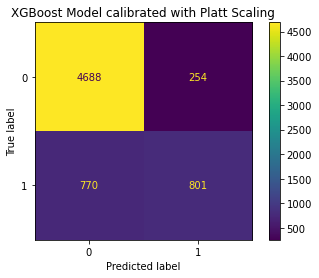

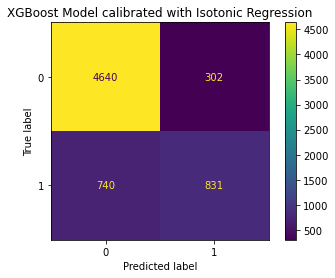

In [38]:
#code here
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_confusion_matrix

xgb_platt = CalibratedClassifierCV(pipe, cv="prefit", method='sigmoid')
xgb_isotonic = CalibratedClassifierCV(pipe, cv="prefit", method='isotonic')

X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, test_size = 0.2, random_state = 42)
xgb_platt.fit(X_calib, y_calib)
xgb_isotonic.fit(X_calib, y_calib)

plot_confusion_matrix(xgb_platt, X_test, y_test)
plt.title("XGBoost Model calibrated with Platt Scaling")

plot_confusion_matrix(xgb_isotonic, X_test, y_test)
plt.title("XGBoost Model calibrated with Isotonic Regression")

plt.show()

3. Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?

In [39]:
#code here
y_prob_platt = xgb_platt.predict_proba(X_test)[:, 1]
y_prob_isotonic = xgb_isotonic.predict_proba(X_test)[:, 1]
print("Brier Score for Platt Scaling : ", brier_score_loss(y_test, y_prob_platt))
print("Brier Score for Isotonic Regression : ", brier_score_loss(y_test, y_prob_isotonic))

Brier Score for Platt Scaling :  0.11304654544723304
Brier Score for Isotonic Regression :  0.11145494694798841


In my case, the calibration methods did not help in improving predicted probabilities. The brier score for the XGBoost model with optimal hyperparameters is 0.11127 whereas the brier scores for the models calibrated with Platt Scaling and Isotonic Regression are 0.11304 and 0.11145 respectively which are higher in value (albeit marginally).